In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./data/facebook.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [5]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()

df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804


In [6]:
df['Shares'] = [1 if df.loc[ei, 'MA10'] > df.loc[ei, 'MA50'] else 0 for ei in df.index]

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares
Date,,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174,1
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758,1
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382,1
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998,1
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804,1


In [11]:
df['Close1'] = df['Close'].shift(-1)

df['Profit'] = [df.loc[ei, 'Close1'] - df.loc[ei, 'Close'] if df.loc[ei, 'Shares'] == 1 else 0 for ei in df.index]
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit
Date,,,,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174,1,22.969999,0.269998
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758,1,23.250000,0.280001
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382,1,22.870001,-0.379999
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998,1,23.219999,0.349998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804,1,23.469999,0.250000


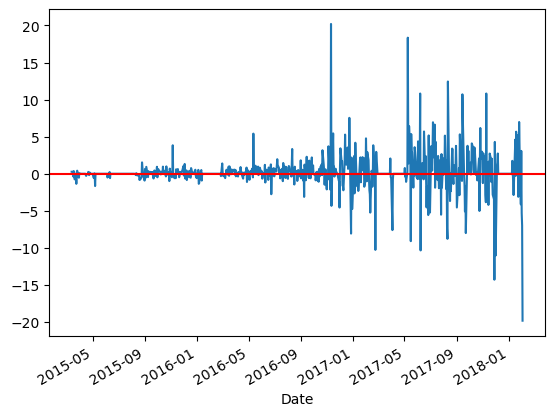

In [14]:
df["Profit"].plot()
plt.axhline(0, color = 'red')
plt.show()

In [15]:
df['Wealth'] = df['Profit'].cumsum()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


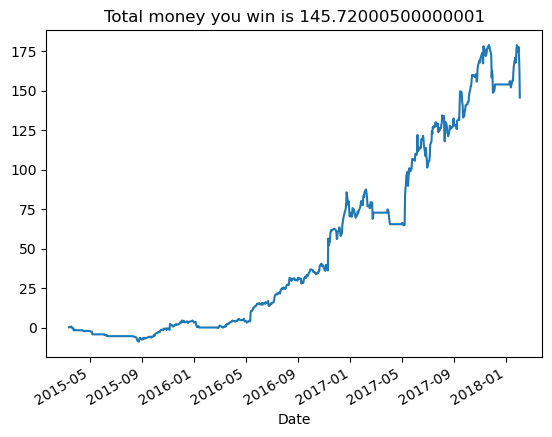

In [18]:
df['Wealth'].plot()
plt.title(f"Total money you win is {df.loc[df.index[-2], 'Wealth']}")
plt.show()